In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's begin at the beginning and get a dataset - I'm going to use all NBA box score data from 2012-2018 for this exercise (dataset found via kaggle). The primary goal of this report is to attempt to determine what box score data can be correlated to the most important stat of any sport...winning!

In [2]:
df = pd.read_csv(r'C:\Users\JohnSteph\Documents\thinkful\nba-enhanced-stats\2012-18_teamBoxScore.csv')
off_df = pd.read_csv(r'C:\Users\JohnSteph\Documents\thinkful\nba-enhanced-stats\2012-18_officialBoxScore.csv')

Starting very simple - what happens when we first look over a scatter of average points scored vs average points against? This is going to be our starting point to evaluate overall points scored vs points against, and determine if there is any relation between those 2 variables. We can also identify which teams have more or less variance in the amount of points scored/surrendered.

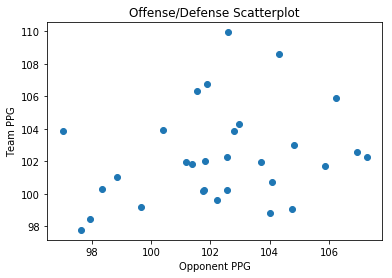

teamAbbr
ATL    101.808943
BKN    100.739837
BOS    101.989817
CHA    100.158537
CHI     99.180894
CLE    103.898374
DAL    102.286585
DEN    105.932927
DET    100.243902
GS     109.936992
HOU    108.632114
IND    100.285132
LAC    106.315041
LAL    102.266260
MEM     97.794715
MIA    101.065041
MIL    100.223577
MIN    102.987805
NO     101.987805
NY      99.597561
OKC    106.750000
ORL     98.810976
PHI     99.042683
PHO    102.550813
POR    104.290650
SA     103.859756
SAC    101.715447
TOR    103.945122
UTA     98.451220
WAS    102.046748
Name: teamPTS, dtype: float64
teamAbbr
ATL    101.365854
BKN    104.060976
BOS    101.171079
CHA    101.733740
CHI     99.664634
CLE    102.794715
DAL    102.546748
DEN    106.219512
DET    101.794715
GS     102.577236
HOU    104.313008
IND     98.354379
LAC    101.544715
LAL    107.262195
MEM     97.628049
MIA     98.863821
MIL    102.544715
MIN    104.804878
NO     103.715447
NY     102.237805
OKC    101.886179
ORL    104.004065
PHI    104.74187

In [3]:
plt.scatter(x = df.groupby('teamAbbr')['opptPTS'].mean(), y = df.groupby('teamAbbr')['teamPTS'].mean())
plt.xlabel('Opponent PPG')
plt.ylabel('Team PPG')
plt.title('Offense/Defense Scatterplot')
plt.show()

print(df.groupby('teamAbbr')['teamPTS'].mean())
print(df.groupby('teamAbbr')['opptPTS'].mean())
print(df.groupby('teamAbbr')['teamPTS'].std())
print(df.groupby('teamAbbr')['opptPTS'].std())

This isn't very useful! There's no clear correlation between offensive and defensive success. Let's take this a step further and see if we can correlate winning to *net* PPG. Additionally, if we look at the net standard deviation (i.e. which teams have more variance in offense compared to defense, or vice versa), is there any trend there?

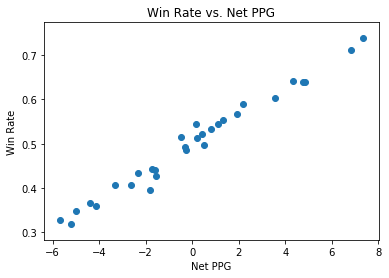

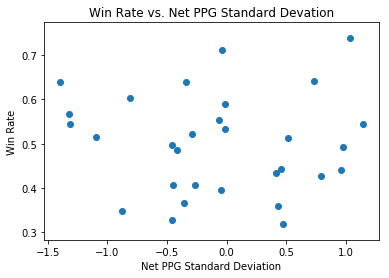

In [4]:
net_ppg = df.groupby('teamAbbr')['teamPTS'].mean() - df.groupby('teamAbbr')['opptPTS'].mean()
wins = df[df['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
losses = df[df['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
win_rate = wins / (wins + losses)
plt.scatter(x = net_ppg, y = win_rate)
plt.xlabel('Net PPG')
plt.ylabel('Win Rate')
plt.title('Win Rate vs. Net PPG')
plt.show()

net_std = df.groupby('teamAbbr')['teamPTS'].std() - df.groupby('teamAbbr')['opptPTS'].std()
plt.scatter(x = net_std, y = win_rate)
plt.xlabel('Net PPG Standard Deviation')
plt.ylabel('Win Rate')
plt.title('Win Rate vs. Net PPG Standard Devation')
plt.show()

Now we're starting to see something! This follows the intuition that outscoring opponents by more generally leads to more winning. Additionally, it doesn't appear to matter if a team is more consistent on offense *or* defense, so long as the net points per game remain the same. Let's see if any teams stand out in that metric...

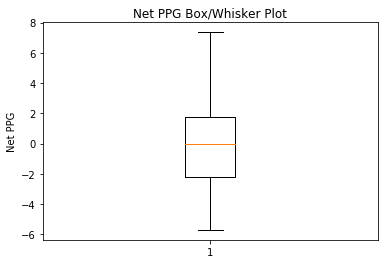

In [5]:
plt.boxplot(net_ppg)
plt.ylabel('Net PPG')
plt.title('Net PPG Box/Whisker Plot')
plt.show()

It doesn't appear that there are any particularly extreme outliers here - this makes sense given the large sample size of games (6 full seasons * 82 games per season per team). Let's at least see who our best and worst teams are...

In [6]:
print(net_ppg.sort_values())

teamAbbr
PHI   -5.699187
ORL   -5.193089
LAL   -4.995935
PHO   -4.398374
SAC   -4.138211
BKN   -3.321138
NY    -2.640244
MIL   -2.321138
MIN   -1.817073
NO    -1.727642
CHA   -1.575203
DET   -1.550813
CHI   -0.483740
DEN   -0.286585
DAL   -0.260163
MEM    0.166667
WAS    0.223577
ATL    0.443089
UTA    0.500000
BOS    0.818737
CLE    1.103659
POR    1.325203
IND    1.930754
MIA    2.201220
TOR    3.548780
HOU    4.319106
LAC    4.770325
OKC    4.863821
SA     6.839431
GS     7.359756
dtype: float64


Unsurprisingly, Golden State shows up as the best team and Philadelphia as the worst over this time frame (#TrustTheProcess). Let's delve into the differences between these 2 teams and see if we can't figure out other aspects that increase the likelihood of winning. What if we look at overall team stats from this time period?

In [7]:
basic_stats = df[['teamAbbr', 'teamPTS', 'teamAST', 'teamTO', 'teamSTL', 'teamBLK', 'teamPF', 'teamTRB']].groupby('teamAbbr').mean()
basic_stats.style.background_gradient(cmap='summer')

,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamTRB
teamAbbr,,,,,,,
ATL,101.809,24.6829,15.1118,8.4248,4.69512,18.6463,41.628
BKN,100.74,21.5935,14.9268,7.34756,4.36992,19.8089,42.3354
BOS,101.99,23.3625,14.1385,7.94094,4.20978,20.9735,42.8432
CHA,100.159,21.2581,12.502,6.73374,5.20528,17.8963,43.3516
CHI,99.1809,22.7053,14.1016,7.03659,5.03862,18.7967,45.0447
CLE,103.898,22.1159,13.9106,7.12195,3.94106,19.437,43.0874
DAL,102.287,22.4858,12.9004,7.66667,4.2561,19.752,41.3476
DEN,105.933,23.6199,14.9959,7.77846,5.04878,20.8882,45.1037
DET,100.244,21.1829,13.6606,7.44106,4.29065,19.063,44.7053


Surprisingly, Philadelphia does outperform Golden State in one aspect - they averaged more steals over these 6 seasons. Are steals not very well correlated to winning, then?

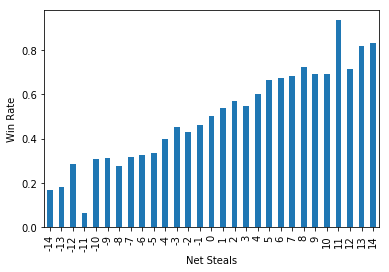

In [8]:
df['net_steals'] = df['teamSTL'] - df['opptSTL']
steals_wins = df[df['teamRslt'].str.contains("Win")].groupby('net_steals').size()
steals_losses = df[df['teamRslt'].str.contains("Loss")].groupby('net_steals').size()
steals_win_rate = steals_wins / (steals_wins + steals_losses)
steals_win_rate[2:-2].plot(kind = "bar")
# The first 2 and last 2 data points have been removed, there was only 1 game for those extreme net steal values.
plt.xlabel('Net Steals')
plt.ylabel('Win Rate')
plt.show()

It appears that steals *are* correlated with winning, but not enough to outweigh all the other aspects in which Golden State was superior to Philadelphia. For future study, it would be good to explore how strongly each statistic is correlated with winning, since despite being second in steals, Philadelphia was last in Net PPG. Additionally, the above chart only looks at *net* steals, while Philadelphia is second in *team* steals.

Let's compare a couple of the other statistics from the above table in a slightly different manner - by comparing the net assists and blocks per game for both Golden State and Philadelphia, we should be able to see distinct differences in the frequency of games with particular assist/block margins.

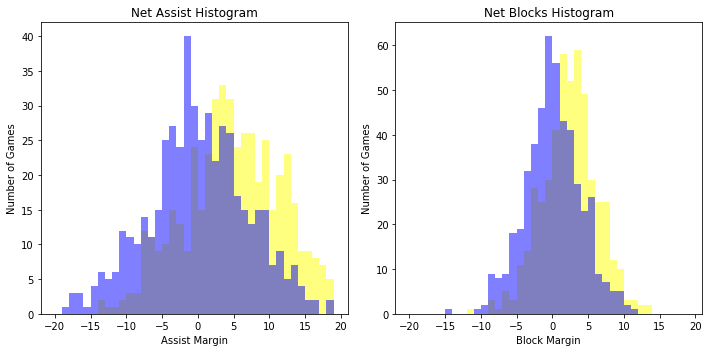

In [9]:
gs = df.loc[df['teamAbbr'] == 'GS']
phi = df.loc[df['teamAbbr'] == 'PHI']

net_ast_gs = gs['teamAST'] - gs['opptAST']
net_ast_phi = phi['teamAST'] - phi['opptAST']
net_blk_gs = gs['teamBLK'] - gs['opptBLK']
net_blk_phi = phi['teamBLK'] - phi['opptBLK']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(net_ast_gs, color='yellow', bins=np.arange(-20, 20), alpha=.5)
plt.hist(net_ast_phi, color='blue', bins=np.arange(-20, 20), alpha=.5)
plt.xlabel('Assist Margin')
plt.ylabel('Number of Games')
plt.title('Net Assist Histogram')

plt.subplot(1, 2, 2)
plt.hist(net_blk_gs, color='yellow', bins=np.arange(-20, 20), alpha=.5)
plt.hist(net_blk_phi, color='blue', bins=np.arange(-20, 20), alpha=.5)
plt.xlabel('Block Margin')
plt.ylabel('Number of Games')
plt.title('Net Blocks Histogram')

plt.tight_layout()
plt.show()

Exactly as expected! Golden State's histograms for both of the stats are very clearly shifted in the positive direction - meaning that they've had more games with higher assist and block margins.

We've seen that some performance-based statistics are intuitively correlated to winning, but how about aspects that are outside of a team's control? Let's evaluate teams' performances with specific officials to see if any officials are more or less favorable to specific teams. First, find the referees who officiated the most games.

In [10]:
off_df['off'] = off_df['offFNm'] + ' ' + off_df['offLNm']
off_df.off.value_counts().head(5)

John Goble         808
Kane Fitzgerald    794
Zach Zarba         790
Marc Davis         786
Scott Foster       786
Name: off, dtype: int64

Now, find each team's win rate with these most-worked officials.

In [11]:
team_names = sorted(off_df['teamAbbr'].unique())
overall_win_rate = pd.DataFrame({
    'teamAbbr': team_names
})

for name in off_df['off'].value_counts().index[:5].tolist():
    dummy_df = off_df[off_df['off'] == name]
    off_wins = dummy_df[dummy_df['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
    off_losses = dummy_df[dummy_df['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
    off_win_rate = off_wins.values / (off_wins.values + off_losses.values)
    overall_win_rate[name] = off_win_rate
    
overall_win_rate.set_index('teamAbbr', inplace=True)
print(overall_win_rate)

          John Goble  Kane Fitzgerald  Zach Zarba  Marc Davis  Scott Foster
teamAbbr                                                                   
ATL         0.607143         0.666667    0.566667    0.464286      0.384615
BKN         0.518519         0.451613    0.379310    0.392857      0.346154
BOS         0.615385         0.484848    0.517241    0.400000      0.500000
CHA         0.441176         0.409091    0.566667    0.409091      0.592593
CHI         0.608696         0.652174    0.454545    0.705882      0.625000
CLE         0.520000         0.416667    0.571429    0.608696      0.500000
DAL         0.533333         0.516129    0.458333    0.458333      0.416667
DEN         0.666667         0.461538    0.714286    0.531250      0.370370
DET         0.441176         0.478261    0.370370    0.333333      0.611111
GS          0.800000         0.695652    0.636364    0.785714      0.757576
HOU         0.466667         0.760000    0.645161    0.612903      0.760000
IND         

There are some pretty stark differences across officials for each team! For example: Denver won 71.4% of games with Zach Zarba officiating, but only 37.0% with Scott Foster. New Orleans has a similar spread, winning only 32.1% of games with Zarba but 66.7% with Fitzgerald...more than *double* their win rate with Zach Zarba on the court! For future study, it would be interesting to correlate net foul margin for each team with each official, then relate that information to the winning rate with said official. Additionally, this could be delved into even further by looking at player specific data to see if certain officials are more or less likely to call fouls on certain players.